<a href="https://colab.research.google.com/github/Steel3264/AI/blob/main/AI_W4_25_2_23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 13.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=e7caca1035d60cec50749b34bb4ec553ed088fb54f125a595050808aa4a14071
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


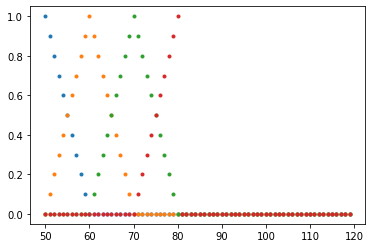

In [4]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl
x = np.arange(50,120,1)
slow = fuzz.trimf(x,[50,50,60])
plt.figure()
plt.plot(x, slow, '.', linewidth = 1.5, label = 'slow')
medium = fuzz.trimf(x,[50,60,70])
plt.plot(x, medium, '.', linewidth = 1.5, label = 'medium')
medium_fast = fuzz.trimf(x,[60,70,80])
plt.plot(x, medium_fast, '.', linewidth = 1.5, label = 'medium_fast')
full_speed = fuzz.trimf(x,[70, 80,80])
plt.plot(x, full_speed, '.', linewidth = 1.5, label = 'full_speed')



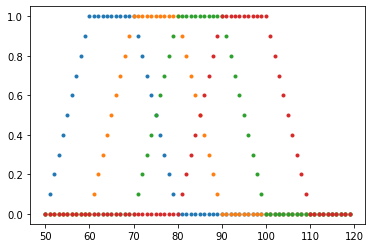

In [ ]:
slow = fuzz.trapmf(x,[50,60,70,80])
plt.plot(x, slow, '.', linewidth = 1.5, label = 'slow')
medium = fuzz.trapmf(x,[60,70,80,90])
plt.plot(x, medium, '.', linewidth = 1.5, label = 'medium')
medium_fast = fuzz.trapmf(x,[70,80,90,100])
plt.plot(x, medium_fast, '.', linewidth = 1.5, label = 'medium_fast')
full_speed = fuzz.trapmf(x,[80, 90,100,110])
plt.plot(x, full_speed, '.', linewidth = 1.5, label = 'full_speed')

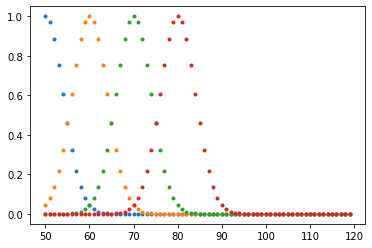

In [ ]:
slow = fuzz.gaussmf(x,50,4)
plt.plot(x, slow, '.', linewidth = 1.5, label = 'slow')
medium = fuzz.gaussmf(x,60,4)
plt.plot(x, medium, '.', linewidth = 1.5, label = 'medium')
medium_fast = fuzz.gaussmf(x,70,4)
plt.plot(x, medium_fast, '.', linewidth = 1.5, label = 'medium_fast')
full_speed = fuzz.gaussmf(x, 80, 4)
plt.plot(x, full_speed, '.', linewidth = 1.5, label = 'full_speed')

39.999999999999986


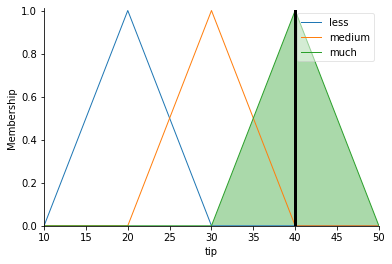

In [12]:
food = ctrl.Antecedent(np.arange(0,11,1), 'food')
service = ctrl.Antecedent(np.arange(0,11,1), 'service')
tip = ctrl.Consequent(np.arange(10,51,1), 'tip')

food['poor'] = fuzz.trimf(food.universe, [0,0,5])
food['average'] = fuzz.trimf(food.universe, [0,5,10])
food['good'] = fuzz.trimf(food.universe, [5,10,10])
service['poor'] = fuzz.trimf(service.universe, [0,0,5])
service['average'] = fuzz.trimf(service.universe, [0,5,10])
service['good'] = fuzz.trimf(service.universe, [5,10,10])
tip['less'] = fuzz.trimf(tip.universe, [10,20,30])
tip['medium'] = fuzz.trimf(tip.universe, [20,30,40])
tip['much'] = fuzz.trimf(tip.universe, [30,40,50])

# food.view()
# service.view()
# tip.view()
# service['average'].view()

rule1 = ctrl.Rule(food['poor'] & service['poor'],tip['less'])
rule2 = ctrl.Rule(food['poor'] & service['average'],tip['less'])
rule3 = ctrl.Rule(food['poor'] & service['good'],tip['less'])
rule4 = ctrl.Rule(food['average'] & service['poor'],tip['less'])
rule5 = ctrl.Rule(food['average'] & service['average'],tip['much'])
rule6 = ctrl.Rule(food['average'] & service['good'],tip['much'])
rule7 = ctrl.Rule(food['good'] & service['poor'],tip['less'])
rule8 = ctrl.Rule(food['good'] & service['average'],tip['much'])
rule9 = ctrl.Rule(food['good'] & service['good'],tip['much'])

tipping_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9])
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)

tipping.input['food'] = 50
tipping.input['service'] = 20
tipping.compute()
print(tipping.output['tip'])
tip.view(sim = tipping)

95.0


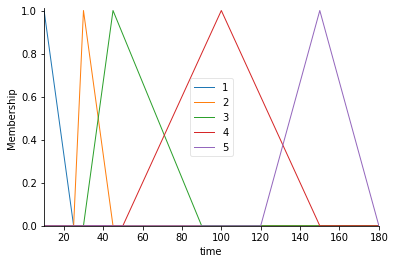

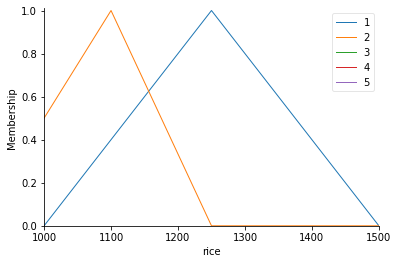

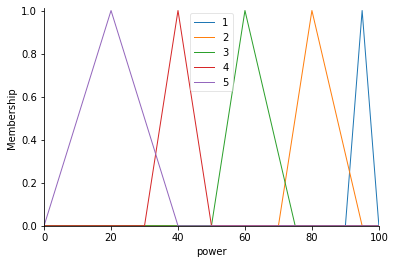

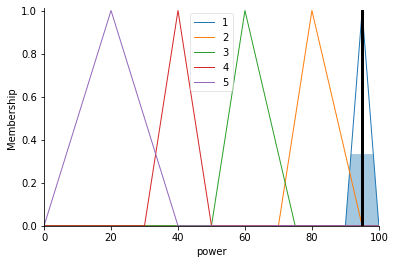

In [17]:
time = ctrl.Antecedent(np.arange(10,181,1), 'time')
rice = ctrl.Antecedent(np.arange(1000,1501,1), 'rice')
power = ctrl.Consequent(np.arange(0,101,1), 'power')


time['1'] = fuzz.trimf(time.universe, [10,10,25])
time['2'] = fuzz.trimf(time.universe, [25,30,45])
time['3'] = fuzz.trimf(time.universe, [30,45,90])
time['4'] = fuzz.trimf(time.universe, [50,100,150])
time['5'] = fuzz.trimf(time.universe, [120,150,180])

rice['1'] = fuzz.trimf(rice.universe, [1000,1250,1500])
rice['2'] = fuzz.trimf(rice.universe, [900,1100,1250])
rice['3'] = fuzz.trimf(rice.universe, [300,600,900])
rice['4'] = fuzz.trimf(rice.universe, [200,400,600])
rice['5'] = fuzz.trimf(rice.universe, [100,200,300])

power['1'] = fuzz.trimf(power.universe, [90,95,100])
power['2'] = fuzz.trimf(power.universe, [70,80,95])
power['3'] = fuzz.trimf(power.universe, [50,60,75])
power['4'] = fuzz.trimf(power.universe, [30,40,50])
power['5'] = fuzz.trimf(power.universe, [0,20,40])
time.view()
rice.view()
power.view()

rule1 = ctrl.Rule(time['1'] & rice['1'],power['1'])
rule2 = ctrl.Rule(time['1'] & rice['2'],power['1'])
rule3 = ctrl.Rule(time['1'] & rice['3'],power['2'])
rule4 = ctrl.Rule(time['1'] & rice['4'],power['3'])
rule5 = ctrl.Rule(time['1'] & rice['5'],power['3'])
rule6 = ctrl.Rule(time['2'] & rice['1'],power['1'])
rule7 = ctrl.Rule(time['2'] & rice['2'],power['1'])
rule8 = ctrl.Rule(time['2'] & rice['3'],power['2'])
rule9 = ctrl.Rule(time['2'] & rice['4'],power['2'])
rule10 = ctrl.Rule(time['2'] & rice['5'],power['3'])
rule11 = ctrl.Rule(time['3'] & rice['1'],power['1'])
rule12 = ctrl.Rule(time['3'] & rice['2'],power['2'])
rule13 = ctrl.Rule(time['3'] & rice['3'],power['2'])
rule14 = ctrl.Rule(time['3'] & rice['4'],power['4'])
rule15 = ctrl.Rule(time['3'] & rice['5'],power['4'])
rule16 = ctrl.Rule(time['4'] & rice['1'],power['2'])
rule17 = ctrl.Rule(time['4'] & rice['2'],power['2'])
rule18 = ctrl.Rule(time['4'] & rice['3'],power['3'])
rule19 = ctrl.Rule(time['4'] & rice['4'],power['3'])
rule20 = ctrl.Rule(time['4'] & rice['5'],power['4'])
rule21 = ctrl.Rule(time['5'] & rice['1'],power['4'])
rule22 = ctrl.Rule(time['5'] & rice['2'],power['4'])
rule23 = ctrl.Rule(time['5'] & rice['3'],power['4'])
rule24 = ctrl.Rule(time['5'] & rice['4'],power['4'])
rule25 = ctrl.Rule(time['5'] & rice['5'],power['5'])

powerc_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16,rule17,rule18,rule19,rule20,rule21,rule22,rule23,rule24,rule25])
powerc = ctrl.ControlSystemSimulation(powerc_ctrl)

powerc.input['time'] = 20
powerc.input['rice'] = 50

powerc.compute()

print(powerc.output['power'])
power.view(sim = powerc)